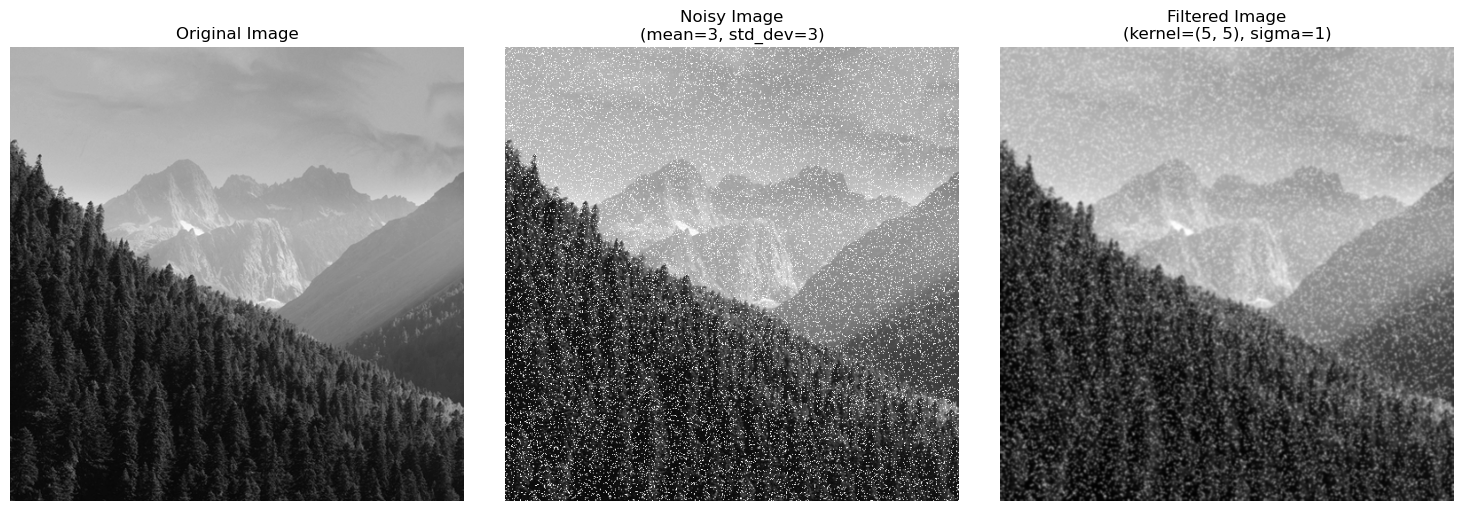

In [11]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)


def add_noise(image, mean=0, std_dev=25):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)  # Gaussian noise
    noisy_image = cv2.add(image, noise)
    return noisy_image, mean, std_dev


def apply_gaussian_filter(noisy_image, kernel_size=(5, 5), sigma=1):
    filtered_image = cv2.GaussianBlur(noisy_image, kernel_size, sigma)
    return filtered_image, kernel_size, sigma


noisy_image, noise_mean, noise_std_dev = add_noise(image, mean=3, std_dev=3)
filtered_image, kernel_size, sigma = apply_gaussian_filter(noisy_image, kernel_size=(5, 5), sigma=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title(f'Noisy Image\n(mean={noise_mean}, std_dev={noise_std_dev})')
axes[1].axis('off')

axes[2].imshow(filtered_image, cmap='gray')
axes[2].set_title(f'Filtered Image\n(kernel={kernel_size}, sigma={sigma})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

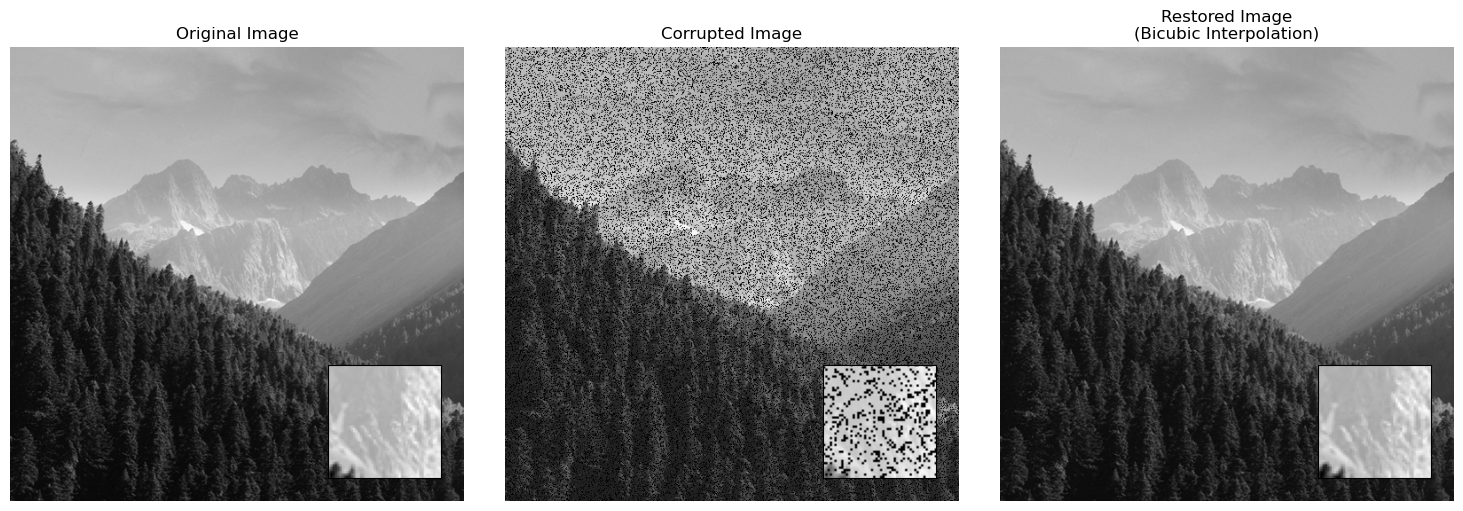

In [19]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)


def remove_pixels(image, mask_fraction=0.2):
    mask = np.random.rand(*image.shape) < mask_fraction
    corrupted_image = image.copy()
    corrupted_image[mask] = 0
    return corrupted_image, mask


def fill_missing_bicubic(image, mask):
    rows, cols = np.indices(image.shape)
    known_points = np.column_stack((rows[~mask], cols[~mask]))
    known_values = image[~mask]
    missing_points = np.column_stack((rows[mask], cols[mask]))
    interpolated_values = griddata(known_points, known_values, missing_points, method='cubic')
    filled_image = image.copy()
    filled_image[mask] = np.clip(interpolated_values, 0, 255).astype(np.uint8)
    return filled_image


def add_zoomed_view(ax, image, zoom_size=50):
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    zoomed = image[center_y - zoom_size // 2:center_y + zoom_size // 2,
             center_x - zoom_size // 2:center_x + zoom_size // 2]
    ax_inset = ax.inset_axes([0.7, 0.05, 0.25, 0.25])
    ax_inset.imshow(zoomed, cmap='gray')
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])


corrupted_image, mask = remove_pixels(image, mask_fraction=0.2)
restored_image = fill_missing_bicubic(corrupted_image, mask)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
add_zoomed_view(axes[0], image)

axes[1].imshow(corrupted_image, cmap='gray')
axes[1].set_title('Corrupted Image')
axes[1].axis('off')
add_zoomed_view(axes[1], corrupted_image)

axes[2].imshow(restored_image, cmap='gray')
axes[2].set_title('Restored Image\n(Bicubic Interpolation)')
axes[2].axis('off')
add_zoomed_view(axes[2], restored_image)

plt.tight_layout()
plt.show()

C:\Users\kozub\AppData\Local\Temp\ipykernel_16304\147802552.py:21: RuntimeWarning: invalid value encountered in cast
  filled_image[mask] = np.clip(interpolated_values, 0, 255).astype(np.uint8)


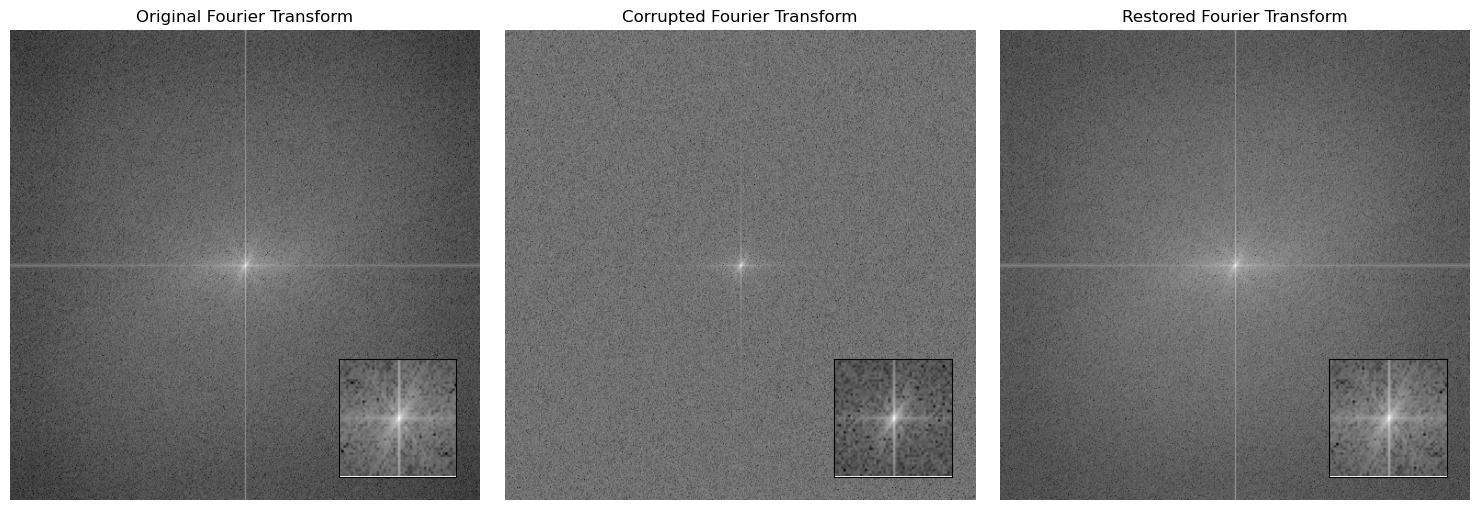

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

image = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)


def remove_pixels(image, mask_fraction=0.2):
    mask = np.random.rand(*image.shape) < mask_fraction
    corrupted_image = image.copy()
    corrupted_image[mask] = 0
    return corrupted_image, mask


def fill_missing_bicubic(image, mask):
    rows, cols = np.indices(image.shape)
    known_points = np.column_stack((rows[~mask], cols[~mask]))
    known_values = image[~mask]
    missing_points = np.column_stack((rows[mask], cols[mask]))
    interpolated_values = griddata(known_points, known_values, missing_points, method='cubic')
    filled_image = image.copy()
    filled_image[mask] = np.clip(interpolated_values, 0, 255).astype(np.uint8)
    return filled_image


def compute_fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return magnitude_spectrum


def add_zoomed_view(ax, image, zoom_size=50):
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    zoomed = image[center_y - zoom_size // 2:center_y + zoom_size // 2,
             center_x - zoom_size // 2:center_x + zoom_size // 2]
    ax_inset = ax.inset_axes([0.7, 0.05, 0.25, 0.25])
    ax_inset.imshow(zoomed, cmap='gray')
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])


corrupted_image, mask = remove_pixels(image, mask_fraction=0.2)
restored_image = fill_missing_bicubic(corrupted_image, mask)

original_ft = compute_fourier_transform(image)
corrupted_ft = compute_fourier_transform(corrupted_image)
restored_ft = compute_fourier_transform(restored_image)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_ft, cmap='gray')
axes[0].set_title('Original Fourier Transform')
axes[0].axis('off')
add_zoomed_view(axes[0], original_ft)

axes[1].imshow(corrupted_ft, cmap='gray')
axes[1].set_title('Corrupted Fourier Transform')
axes[1].axis('off')
add_zoomed_view(axes[1], corrupted_ft)

axes[2].imshow(restored_ft, cmap='gray')
axes[2].set_title('Restored Fourier Transform')
axes[2].axis('off')
add_zoomed_view(axes[2], restored_ft)

plt.tight_layout()
plt.show()